In [0]:
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Data

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
data.train.labels[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [4]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])
data.test.cls[0:5]

array([7, 2, 1, 0, 4])

# Preprocessing Data

In [0]:
img_size = 28
img_flat_size = img_size*img_size
img_shape=(img_size, img_size)
num_class = len(data.train.labels[0])

In [0]:
def plot_img(images, cls_true, cls_pred=None):
  fig, axes = plt.subplots(3,3)
  fig.subplots_adjust(hspace=0.3, wspace=0.3)
  
  for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(img_shape), cmap='binary')
    
    if cls_pred is None:
      xlabel = 'True : {}'.format(cls_true[i])
    else:
      xlabel = 'True: {}, Pred: {}'.format(cls_true[i],cls_pred[i])
      
    ax.set_xlabel(xlabel)
    
    ax.set_xticks([])
    ax.set_yticks([])

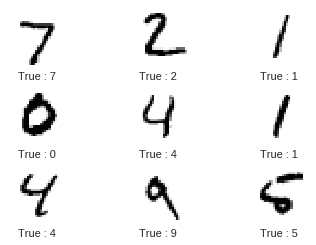

In [7]:
images = data.test.images[0:9]
cls_true = data.test.cls[0:9]

plot_img(images, cls_true)

# Tensorflow Variables & Computation Graph

In [8]:
x = tf.placeholder(tf.float32, [None, img_flat_size])
y_true = tf.placeholder(tf.float32, [None, num_class])
y_true_cls = tf.placeholder(tf.int64, [None])

weights = tf.Variable(tf.zeros([img_flat_size, num_class]))
biases = tf.Variable(tf.zeros([num_class]))

logits = tf.matmul(x, weights) + biases
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1)


#loss
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_true)
cost = tf.reduce_mean(cross_entropy)

#optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=0.5).minimize(cost)

#accuracy 
correct_pred = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



# Tensorflow Run Graph

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())




batch_size = 128

def optimize(num_iterations):
  for i in range(num_iterations):
    x_batch, y_batch = data.train.next_batch(batch_size)
    feed_dict_train = {x:x_batch, y_true:y_batch}
    sess.run(optimizer, feed_dict=feed_dict_train)
    
 

    
    
feed_dict_test = {x:data.test.images, y_true:data.test.labels, y_true_cls:data.test.cls}

def accuracy_test():
  acc = sess.run(accuracy, feed_dict=feed_dict_test)
  print('Accuracy = ',acc)
  

  
  
def plot_exaple_errors():
  correct, cls_pred = sess.run([correct_pred, y_pred_cls], feed_dict_test)
  
  incorrect = (correct == False)
  images = data.test.images[incorrect]
  cls_pred = cls_pred[incorrect]
  cls_true = data.test.cls[incorrect]
  
  plot_img(images[0:9], cls_true[0:9], cls_pred[0:9])

  
  
  

def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    w = sess.run(weights)
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Create figure with 3x4 sub-plots,
    # where the last 2 sub-plots are unused.
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            # Get the weights for the i'th digit and reshape it.
            # Note that w.shape == (img_size_flat, 10)
            image = w[:, i].reshape(img_shape)

            # Set the label for the sub-plot.
            ax.set_xlabel("Weights: {0}".format(i))

            # Plot the image.
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

# TF Run Optimizer

Accuracy =  0.8717


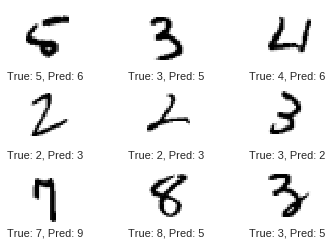

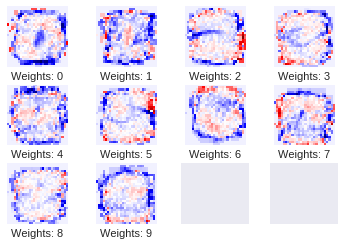

In [10]:
optimize(1000)
accuracy_test()
plot_exaple_errors()
plot_weights()

Accuracy =  0.8913


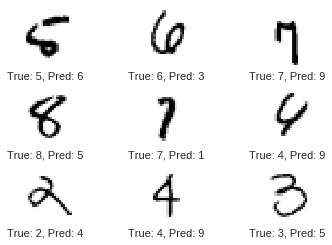

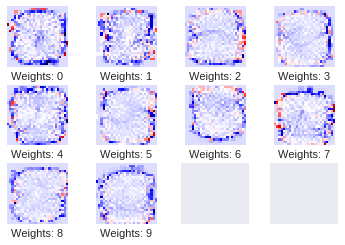

In [11]:
optimize(9000)
accuracy_test()
plot_exaple_errors()
plot_weights()